# Exploratory Data Analyses 

#### Import Necessary Libraries

In [101]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Merging 12 months of sales data into a single file

In [102]:
files = [file for file in os.listdir('./sales_data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./sales_data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

#### Read in updated dataframe

In [103]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Order Date,Purchase Address
0,40092,Shoes,F,Wedges,36.0,brown,1,69.95,29/04/2019 22:16,"Spoorstraat 92, 1085KK Zwolle"
1,40093,Bags,F,Backpack,NaN,white,1,59.99,21/04/2019 21:41,"Meidoornlaan 34, 1098GX Alphen aan den Rijn"
2,40094,Shoes,M,Sneakers,38.0,beige,1,99.99,01/04/2019 15:35,"Meidoornstraat 54, 1044CK Venlo"
3,40094,Shoes,M,Sneakers,38.0,grey,1,99.99,01/04/2019 15:35,"Meidoornstraat 54, 1044CK Venlo"
4,40095,Shoes,M,Combat,35.0,multicolor,1,119.99,30/04/2019 18:11,"Frans Halsstraat 78, 1072EF Utrecht"


### Visually inspect data

In [104]:
all_data.columns

Index(['Order ID', 'Category', 'Gender', 'Product', 'Size', 'Color',
       'Quantity Ordered', 'Price each', 'Order Date', 'Purchase Address'],
      dtype='object')

In [105]:
all_data.shape

(18333, 10)

In [106]:
all_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18333 entries, 0 to 18332
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          18333 non-null  int64  
 1   Category          18333 non-null  object 
 2   Gender            17753 non-null  object 
 3   Product           18333 non-null  object 
 4   Size              12143 non-null  float64
 5   Color             17753 non-null  object 
 6   Quantity Ordered  18333 non-null  int64  
 7   Price each        18333 non-null  float64
 8   Order Date        18333 non-null  object 
 9   Purchase Address  18333 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8 MB


### Change columns to the correct datatype and lowering memory usage

Memory usage before changing datatypes: 4.8 MB

In [107]:
all_data.memory_usage(deep=True)

Index                    64
Order ID             146664
Category             637733
Gender               615202
Product              675166
Size                 146664
Color                617653
Quantity Ordered     146664
Price each           146664
Order Date           824985
Purchase Address    1108996
dtype: int64

In [108]:
all_data['Category'].unique()

array(['Shoes', 'Bags', 'Accessories'], dtype=object)

In [109]:
all_data['Category'] = all_data['Category'].astype('category')

In [110]:
all_data['Gender'].unique()

array(['F', 'M', nan], dtype=object)

In [111]:
all_data['Gender'] = all_data['Gender'].astype('category')

In [112]:
all_data['Product'].unique()

array(['Wedges', 'Backpack', 'Sneakers', 'Combat', 'Shopper',
       'Boat shoes', 'Loafers', 'Ballerinas', 'Shoulderbag', 'Pumps',
       'Boots', 'Laptopbag', 'Handbag', 'Belt', 'Sunglasses', 'Socks',
       'Scarf', 'Ankle Boots', 'Shoe care', 'Sandals', 'Wallet',
       'Flip Flops', 'Calf Boots', 'Clutch', 'Gloves', 'Summerhat'],
      dtype=object)

In [113]:
all_data['Product'] = all_data['Product'].astype('category')

In [114]:
all_data['Color'].unique()

array(['brown', 'white', 'beige', 'grey', 'multicolor', 'black', 'blue',
       'red', nan, 'pink', 'gold', 'silver', 'green'], dtype=object)

In [115]:
all_data['Color'] = all_data['Color'].astype('category')

In [116]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [117]:
all_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18333 entries, 0 to 18332
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          18333 non-null  int64         
 1   Category          18333 non-null  category      
 2   Gender            17753 non-null  category      
 3   Product           18333 non-null  category      
 4   Size              12143 non-null  float64       
 5   Color             17753 non-null  category      
 6   Quantity Ordered  18333 non-null  int64         
 7   Price each        18333 non-null  float64       
 8   Order Date        18333 non-null  datetime64[ns]
 9   Purchase Address  18333 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.8 MB


Memory usages after changing datatypes: 1.8 MB

### Inspect missing values

In [118]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18333 entries, 0 to 18332
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          18333 non-null  int64         
 1   Category          18333 non-null  category      
 2   Gender            17753 non-null  category      
 3   Product           18333 non-null  category      
 4   Size              12143 non-null  float64       
 5   Color             17753 non-null  category      
 6   Quantity Ordered  18333 non-null  int64         
 7   Price each        18333 non-null  float64       
 8   Order Date        18333 non-null  datetime64[ns]
 9   Purchase Address  18333 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 860.6+ KB


There are missing values in the columns: 'Gender', 'Size' and 'Color'.

#### 'Gender' column

In [119]:
df['Gender'].value_counts(dropna=False)

F      1085
M       606
NaN      86
Name: Gender, dtype: int64

The 'Gender' column has 86 missing values.

In [120]:
df[df['Gender'].isna()]

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Order Date,Purchase Address
81,46587,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,05/09/2019 21:44,"Kerkpad 23, 1043KK Den Haag"
110,46609,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,19/09/2019 21:22,"Leliestraat 92, 1014VW Arnhem"
114,46613,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,20/09/2019 18:28,"Leeuwerikstraat 4, 1046KA Enschede"
130,46626,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,13/09/2019 06:04,"Tuinstraat 77, 1013RL Den Haag"
185,46663,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,05/09/2019 12:54,"Schoolstraat 89, 1024YH Den Haag"
...,...,...,...,...,...,...,...,...,...,...
1690,47772,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,04/09/2019 17:13,"Prins Hendrikstraat 10, 1080KR Amsterdam"
1723,47795,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,10/09/2019 20:14,"Kerkplein 60, 1012AG Amsterdam"
1734,47803,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,02/09/2019 01:41,"Schoolstraat 86, 1024EM Amsterdam"
1735,47804,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,18/09/2019 11:35,"Markt 91, 1044YT Utrecht"


At first sight it looks like there are only missing values for 'Gender' in the category 'Accessory'.

In [121]:
df.groupby(['Category', 'Product'])['Gender'].value_counts(dropna=False)

Category     Product      Gender
Accessories  Belt         F          32
                          M          22
             Scarf        F          23
                          M          18
             Shoe care    NaN        86
             Socks        F          24
                          M          24
             Sunglasses   F          30
                          M          22
             Wallet       M          16
                          F          11
Bags         Backpack     M          37
                          F          36
             Clutch       F          32
             Handbag      F          27
             Laptopbag    M          38
                          F          26
             Shopper      F          30
             Shoulderbag  M          40
                          F          35
Shoes        Ankle Boots  F          62
             Ballerinas   F         133
             Boat shoes   M          41
             Boots        M          64
       

Further inspection shows that all the missing values for 'Gender' are with the product 'Shoe care'. We can conclude that the product 'Shoe care' doesn't have a specific gender.

In [122]:
df['Size'].value_counts(dropna=False)

NaN     609
39.0    235
40.0    186
38.0    180
37.0    176
41.0    144
42.0    102
36.0     96
35.0     45
43.0      3
34.0      1
Name: Size, dtype: int64

The 'Size' column has 609 missing values.

In [123]:
df.groupby('Category')['Size'].value_counts(dropna=False)

Category     Size
Accessories  NaN     308
Bags         NaN     301
Shoes        39.0    235
             40.0    186
             38.0    180
             37.0    176
             41.0    144
             42.0    102
             36.0     96
             35.0     45
             43.0      3
             34.0      1
Name: Size, dtype: int64

Only the category 'Shoes' has assigned sizes. The categories 'Accessories' and 'Bags' have missing values for 'Size'.

In [124]:
df['Color'].value_counts(dropna=False)

black         369
grey          352
brown         335
beige         283
multicolor    123
NaN            86
white          84
blue           38
green          33
red            23
pink           19
silver         16
gold           16
Name: Color, dtype: int64

The 'Color' column has 86 missing values.

In [125]:
nan_color = df[df['Color'].isna()]
nan_color.groupby(['Category', 'Product'])['Color'].value_counts(dropna=False)

Category     Product    Color
Accessories  Shoe care  NaN      86
Name: Color, dtype: int64

Only the product 'Shoe care' has missing values for 'Color'.

### Augment data with aditional columns

#### Make the column 'Order Date' the index

In [126]:
all_data.set_index('Order Date', inplace=True)

#### Create a 'Total price' column

In [127]:
all_data['Total price'] = all_data['Quantity Ordered'] * all_data['Price each']
all_data.head()

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Purchase Address,Total price
Order Date,,,,,,,,,,
2019-04-29 22:16:00,40092,Shoes,F,Wedges,36.0,brown,1,69.95,"Spoorstraat 92, 1085KK Zwolle",69.95
2019-04-21 21:41:00,40093,Bags,F,Backpack,NaN,white,1,59.99,"Meidoornlaan 34, 1098GX Alphen aan den Rijn",59.99
2019-01-04 15:35:00,40094,Shoes,M,Sneakers,38.0,beige,1,99.99,"Meidoornstraat 54, 1044CK Venlo",99.99
2019-01-04 15:35:00,40094,Shoes,M,Sneakers,38.0,grey,1,99.99,"Meidoornstraat 54, 1044CK Venlo",99.99
2019-04-30 18:11:00,40095,Shoes,M,Combat,35.0,multicolor,1,119.99,"Frans Halsstraat 78, 1072EF Utrecht",119.99


#### Create a 'City' column

In [128]:
def get_city(address):
    address = address.split(',')[1]
    address = address.split()[1:]
    return ' '.join(map(str, address))

In [129]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))
all_data.head()

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Purchase Address,Total price,City
Order Date,,,,,,,,,,,
2019-04-29 22:16:00,40092,Shoes,F,Wedges,36.0,brown,1,69.95,"Spoorstraat 92, 1085KK Zwolle",69.95,Zwolle
2019-04-21 21:41:00,40093,Bags,F,Backpack,NaN,white,1,59.99,"Meidoornlaan 34, 1098GX Alphen aan den Rijn",59.99,Alphen aan den Rijn
2019-01-04 15:35:00,40094,Shoes,M,Sneakers,38.0,beige,1,99.99,"Meidoornstraat 54, 1044CK Venlo",99.99,Venlo
2019-01-04 15:35:00,40094,Shoes,M,Sneakers,38.0,grey,1,99.99,"Meidoornstraat 54, 1044CK Venlo",99.99,Venlo
2019-04-30 18:11:00,40095,Shoes,M,Combat,35.0,multicolor,1,119.99,"Frans Halsstraat 78, 1072EF Utrecht",119.99,Utrecht


#### How much money was earned in 2019?

In [130]:
total_2019 = all_data['Total price'].sum().round(2)
total_2019

1389304.5

#### What was the best month for sales? How much was earned that month?

In [131]:
month_data = all_data.groupby(all_data.index.month)['Total price'].sum()

In [132]:
month_data.sort_values(ascending=False)

Order Date
10    139346.97
9     128679.04
5     125910.12
12    122800.11
6     121129.20
4     117348.02
11    114566.36
7     110860.50
8     109821.81
3     108816.51
1     100931.02
2      89094.84
Name: Total price, dtype: float64

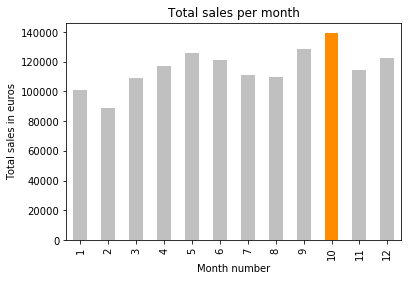

In [133]:
color = ['darkorange' if month == 10 else 'silver' for month in month_data.index]
fig, ax = plt.subplots()
ax = month_data.plot(kind='bar', color=color)
ax.set_xlabel('Month number')
ax.set_ylabel('Total sales in euros')
ax.set_title('Total sales per month')
plt.show()

October was the best month for sales. In October the store earned €139346,97.

### What city had the highest number of sales?

In [134]:
sales_city = all_data.groupby('City')['Total price'].sum()
sales_city.sort_values(ascending=False)

City
Amsterdam              201321.04
Rotterdam              148366.25
Den Haag               125071.36
Utrecht                 72345.13
Groningen               52635.29
Tilburg                 47599.22
Almere                  47372.33
Eindhoven               47152.28
Nijmegen                41371.84
Breda                   40522.92
Amersfoort              37932.63
Apeldoorn               35736.11
Enschede                34175.52
Zaandam                 33929.89
's-Hertogenbosch        33397.26
Haarlem                 32890.10
Arnhem                  32346.18
Zwolle                  29283.05
Leiden                  28979.19
Ede                     28109.64
Zoetermeer              26509.83
Maastricht              26223.91
Dordrecht               25686.01
Leeuwarden              25421.33
Emmen                   23811.39
Delft                   23292.38
Alphen aan den Rijn     23127.32
Venlo                   22286.62
Alkmaar                 21247.48
Deventer                21161.00
Name:

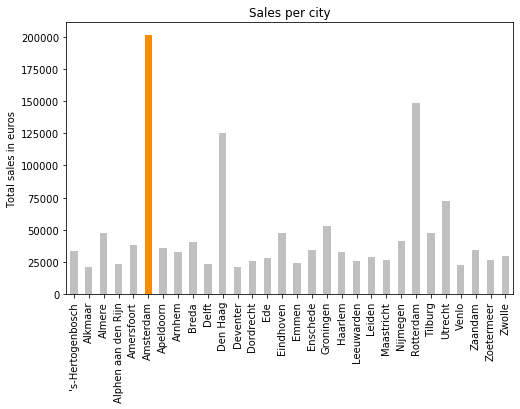

In [135]:
color = ['darkorange' if city == 'Amsterdam' else 'silver' for city in sales_city.index]
fig, ax = plt.subplots(figsize=[8,5])
ax = sales_city.plot(kind='bar', color=color)
ax.set_xlabel('')
ax.set_ylabel('Total sales in euros')
ax.set_title('Sales per city')
plt.show()

### What time should advertisements be displayed to maximize likelihood of customer's buying a product?

In [136]:
hour_data = all_data.groupby(all_data.index.hour)['Order ID'].nunique()
hour_data

Order Date
0     289
1     158
2      81
3      70
4      51
5     115
6     174
7     272
8     467
9     625
10    852
11    928
12    925
13    840
14    853
15    750
16    737
17    809
18    922
19    906
20    896
21    804
22    597
23    465
Name: Order ID, dtype: int64

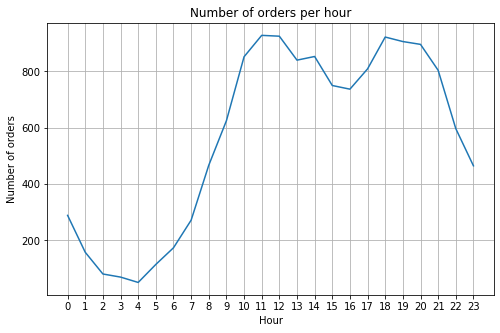

In [137]:
fig, ax = plt.subplots(figsize=[8,5])
ax = hour_data.plot()
ax.set_xticks(hour_data.index)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of orders')
ax.set_title('Number of orders per hour')
ax.grid()
plt.show()

Most sales occur between 11am-12pm and 6pm-8pm.

### Women

In [138]:
womens_shoes = all_data[(all_data['Category'] == 'Shoes') & (all_data['Gender'] == 'F')]
womens_shoes.head()

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Purchase Address,Total price,City
Order Date,,,,,,,,,,,
2019-04-29 22:16:00,40092,Shoes,F,Wedges,36.0,brown,1,69.95,"Spoorstraat 92, 1085KK Zwolle",69.95,Zwolle
2019-04-15 13:16:00,40096,Shoes,F,Sneakers,41.0,brown,1,99.99,"Hogeweg 86, 1061HO Amsterdam",99.99,Amsterdam
2019-02-04 18:19:00,40101,Shoes,F,Ballerinas,41.0,black,1,79.95,"Dahliastraat 7, 1044AR Tilburg",79.95,Tilburg
2019-08-04 18:16:00,40103,Shoes,F,Wedges,41.0,grey,1,69.95,"Molenweg 83, 1053DG Rotterdam",69.95,Rotterdam
2019-03-04 12:13:00,40104,Shoes,F,Ballerinas,41.0,black,1,79.95,"Hoofdstraat 21, 1033MV Delft",79.95,Delft


In [139]:
product_count = womens_shoes.groupby('Product', observed=True)['Quantity Ordered'].sum()

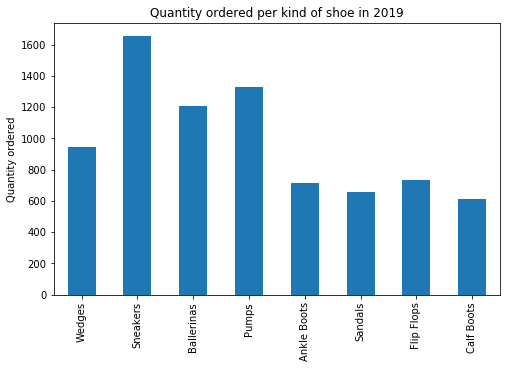

In [140]:
fig, ax = plt.subplots(figsize=[8,5])
ax = product_count.plot(kind='bar')
ax.set_xlabel('')
ax.set_ylabel('Quantity ordered')
ax.set_title('Quantity ordered per kind of shoe in 2019')
plt.show()

In [141]:
product_time = pd.pivot_table(womens_shoes, values='Quantity Ordered', columns='Product', index=womens_shoes.index.month, aggfunc='sum')
product_time

Product,Ankle Boots,Ballerinas,Calf Boots,Flip Flops,Pumps,Sandals,Sneakers,Wedges
Order Date,,,,,,,,
1,87,67,84,28,91,31,111,38
2,39,82,20,43,89,37,137,49
3,59,112,40,39,115,41,130,67
4,50,134,37,31,130,41,171,83
5,35,115,35,135,127,128,106,128
6,35,125,28,135,108,126,106,104
7,19,94,28,137,98,113,129,116
8,46,98,32,23,112,33,141,78
9,58,122,37,51,138,23,203,80


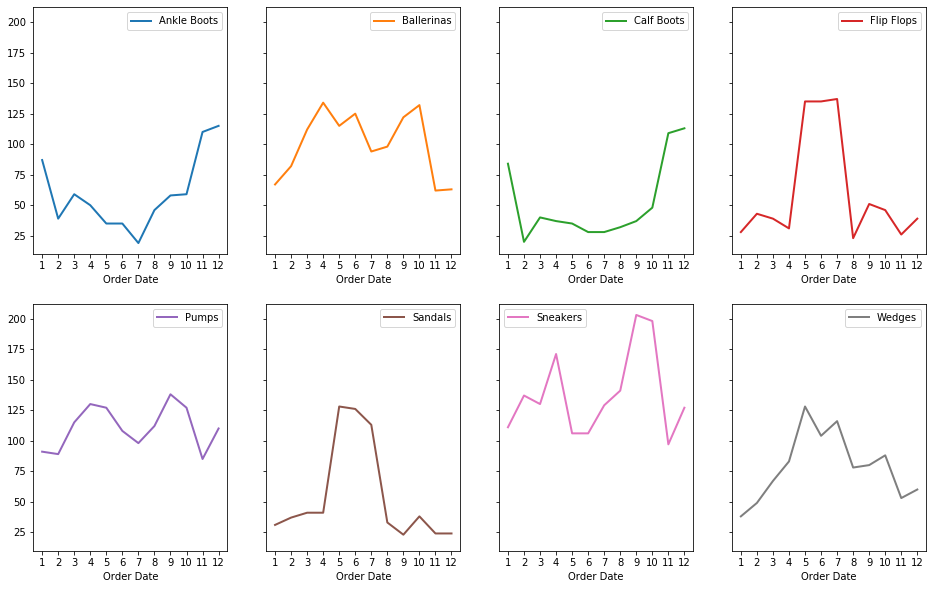

In [143]:
product_time.plot(subplots=True, layout=(2,4), figsize=(16,10), linewidth=2, xticks=product_time.index, 
                  sharex=False, sharey=True)
plt.show()